In [1]:
# this program uses an artificial reccurrent neural network called long short term memory(LSTM)

In [2]:
#  to predict closing stock price of an corporation (Apple Inc) using pass 60 day stock price

In [ ]:
# import the libraries
import numpy as np
import math
import pandas_datareader as web
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [20]:
# get stock price
df  = web.DataReader('AAPL', data_source = 'yahoo', start= '2014-01-01' ,end= '2020-12-17')

In [21]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-31,20.045713,19.785713,19.791786,20.036428,223084400.0,17.849323
2014-01-02,19.893929,19.715000,19.845715,19.754642,234684800.0,17.598297
2014-01-03,19.775000,19.301071,19.745001,19.320715,392467600.0,17.211735
2014-01-06,19.528570,19.057142,19.194643,19.426071,412610800.0,17.305593
2014-01-07,19.498571,19.211430,19.440001,19.287144,317209200.0,17.181829


In [22]:
#get number of rows and columns
df.shape


(1755, 6)

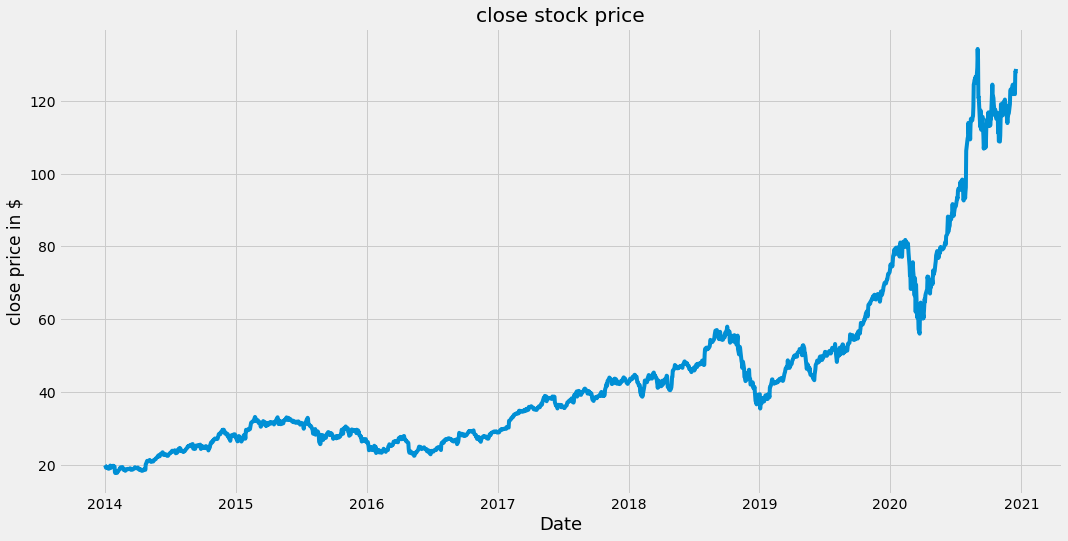

In [23]:
#visualise the cloasing price history
plt.figure(figsize=(16,8))
plt.title('close stock price')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize = 18)
plt.ylabel('close price in $')
plt.show()

In [24]:
#create a new dataframe with only close
data =df.filter(['Close'])
#store values in a numpy array
dataset = data.values
#get number of rows to train the model on
trainin_data_len =  math.ceil(len(dataset)*.8)
trainin_data_len

1404

In [25]:
# scale the data (good practice before using nueral network algorithm)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [26]:
scaled_data

array([[0.01880108],
       [0.0163788 ],
       [0.01264868],
       ...,
       [0.94584409],
       [0.94524236],
       [0.95289296]])

In [28]:
#create training dataset
#scale the dataset
train_data = scaled_data[0:trainin_data_len,:]
# split into xtrain and ytrain
x_train =[]
y_train =[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])


In [35]:
x_train, y_train =np.array(x_train) , np.array(y_train)
x_train.shape

(1344, 60)

In [38]:
#reshape the data
x_train=np.reshape(x_train,(1344,60,1))

In [39]:
x_train

array([[[0.01880108],
        [0.0163788 ],
        [0.01264868],
        ...,
        [0.01387977],
        [0.01228026],
        [0.01156801]],

       [[0.0163788 ],
        [0.01264868],
        [0.01355434],
        ...,
        [0.01228026],
        [0.01156801],
        [0.0113838 ]],

       [[0.01264868],
        [0.01355434],
        [0.01236009],
        ...,
        [0.01156801],
        [0.0113838 ],
        [0.01134697]],

       ...,

       [[0.29898138],
        [0.29603717],
        [0.3016247 ],
        ...,
        [0.29537097],
        [0.29500564],
        [0.29145972]],

       [[0.29603717],
        [0.3016247 ],
        [0.29459731],
        ...,
        [0.29500564],
        [0.29145972],
        [0.29300704]],

       [[0.3016247 ],
        [0.29459731],
        [0.28251969],
        ...,
        [0.29145972],
        [0.29300704],
        [0.29717616]]])

In [40]:
#build the LSTM layer
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [41]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [42]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1344/1344 [==============================] - 28s 18ms/step - loss: 5.9304e-04


In [43]:
# creating the test dataset
#create a new array having values from index 1543 to 2003
test_data = scaled_data[trainin_data_len - 60:,:]
#create x_test and y_test
x_test = []
y_test = dataset[trainin_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [44]:
#conb=vert data in an numpy array
x_test=np.array(x_test)

In [45]:
#reshape the data
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [46]:
# get model's predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [47]:
#get the root mean squared error
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.568283004978104

<ipython-input-50-78c545935004>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


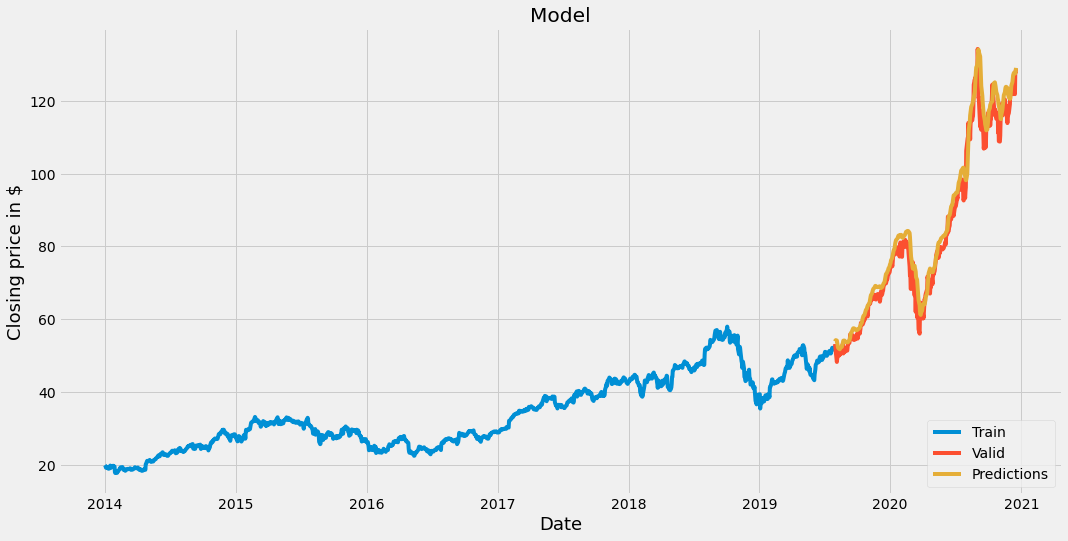

In [50]:
# plot the data
train = data[:trainin_data_len]
valid = data[trainin_data_len:]
valid['Predictions']=predictions
#visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing price in $',fontsize =18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Valid','Predictions'], loc='lower right')
plt.show()

In [49]:
# show valid price and predicted price
valid

,Close,Predictions
Date,,
2019-07-31,53.259998,53.979939
2019-08-01,52.107498,54.217133
2019-08-02,51.005001,54.323227
2019-08-05,48.334999,54.196568
2019-08-06,49.250000,53.591572
...,...,...
2020-12-11,122.410004,127.624619
2020-12-14,121.779999,127.651062
2020-12-15,127.879997,127.453476


In [53]:
#get the qoute
apple_qoute = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01',end='2020-12-17')
# create a new dataframe
new_df = apple_qoute.filter(['Close'])
#get last 60 days closing prices and convert dataframe to an array
last_60_days = new_df[-60:].values
#scale value between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# create an empty list
X_test= []
#append the last 60 days
X_test.append(last_60_days_scaled)
#conver X_test to numpy array
X_test = np.array(X_test)
#reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get predicted price of the stock
pred_price = model.predict(X_test)
# inverse sclaing
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[130.03404]], dtype=float32)

In [55]:
#get the actual qoute
apple_qoute2 = web.DataReader('AAPL', data_source='yahoo', start='2020-12-18',end='2020-12-18')
apple_qoute2['Close']

Date
2020-12-17    128.699997
2020-12-18    126.660004
Name: Close, dtype: float64